###  إستيراد الموارد التي سنحتاجها

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline 


# المرشحات عالية التردد

الأن سنقوم ببناء كل من مرشحي لابلاس و سوبل و إختبارهم على صورة لنرى الفرق بينهم

In [2]:
# مرشح لابلاس

laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
# مرشح سوبل

sobel_x = np.array([[-1,0,1 ],
                   [-2,0,2 ],
                   [-1,0,1 ]])

sobel_y = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

أما الأن سنقوم بقرأت الصورة  و إختبار الكاشف عليها 

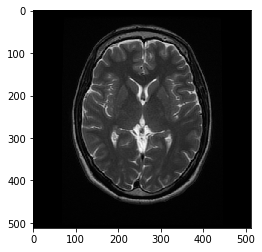

In [12]:
# قراءة الصورة 
image = cv2.imread('images/brain_MR.jpg')

# RGB تغيير الألوان إلى 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#  تحويل الصورة إلى الرمادي 
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)

# إظهار الصورة
plt.imshow(gray, cmap='gray')

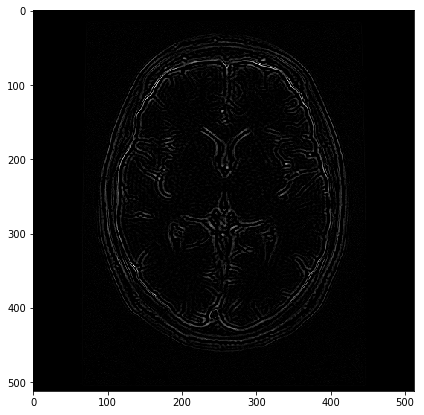

In [25]:
# مرشح لابلاس

# filter2D ترشيح الصورة بإستخدام 

filtered_image =cv2.filter2D(gray , -1 , laplacian)

# إضهار الصورة

plt.figure(figsize=(7,7))
plt.imshow(filtered_image , cmap='gray')


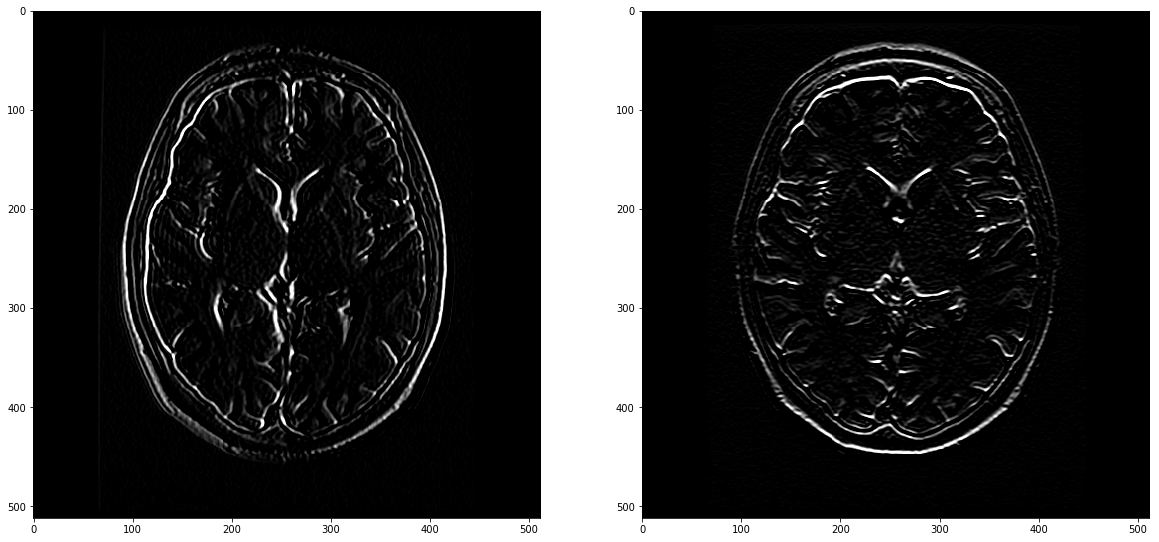

In [14]:
# مرشح سوبل

# filter2D ترشيح الصورة بإستخدام 

x_filtered_image =cv2.filter2D(gray , -1 , sobel_x)
y_filtered_image =cv2.filter2D(gray , -1 , sobel_y)

# إضهار الصورة

f, (ax1 ,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(x_filtered_image , cmap='gray')
ax2.imshow(y_filtered_image , cmap='gray')

#  المرشحات الترددات المنخفضة

هنا سنقوم بتطبيق التنعيم الفاوسي ، و من ثم تطبيق مرشح سوبل و مقارنة الفرق

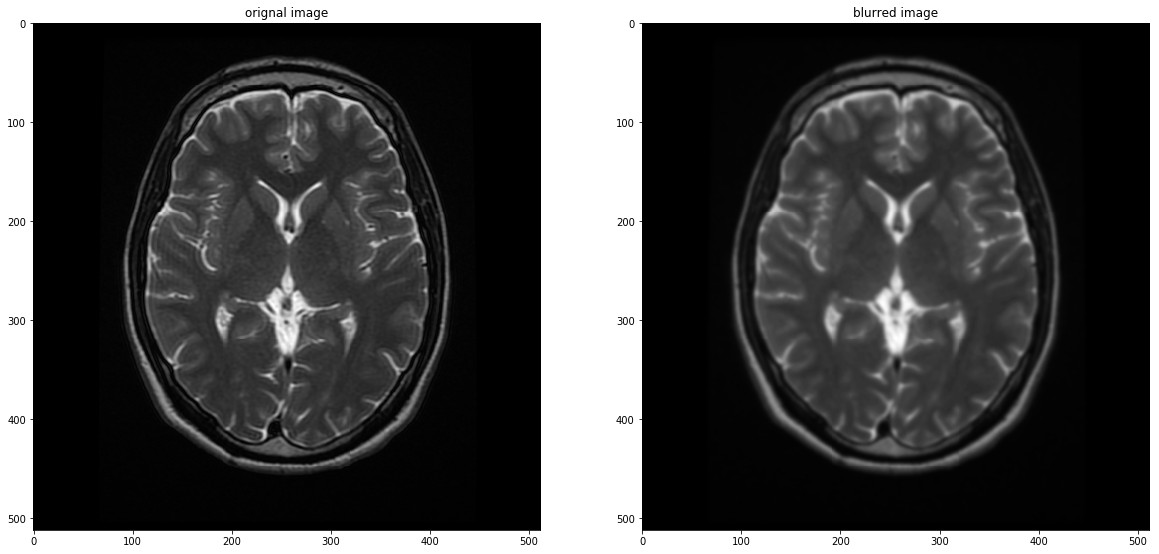

In [28]:
# تطبيق التضبيب الغاوسي 

gray_blur = cv2.GaussianBlur(gray ,(9,9) ,0)

# عرض الصورة 

f , ( ax1 , ax2)= plt.subplots( 1,2 ,figsize=(20 ,10))

ax1.set_title('orignal image')
ax1.imshow(gray , cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur , cmap='gray')

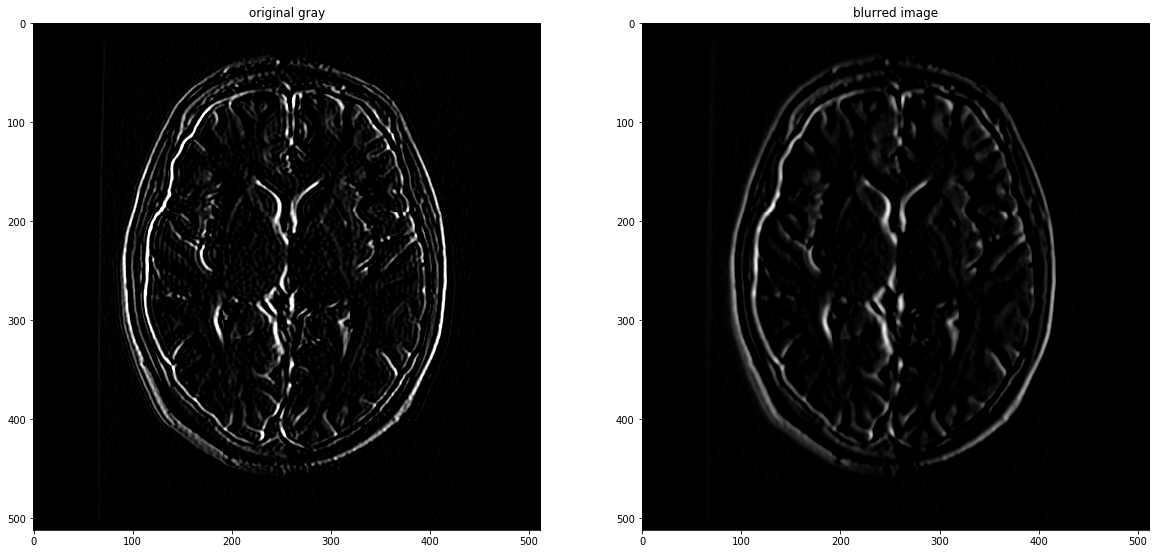

In [29]:
# تطبيق مرشح سوبل العامودي على كلا الصورتين الأصلية و المضببه

filtererd = cv2.filter2D(gray , -1 ,sobel_x)

filtered_blurred = cv2.filter2D(gray_blur , -1 , sobel_x)

# عرض الصورة 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtererd, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

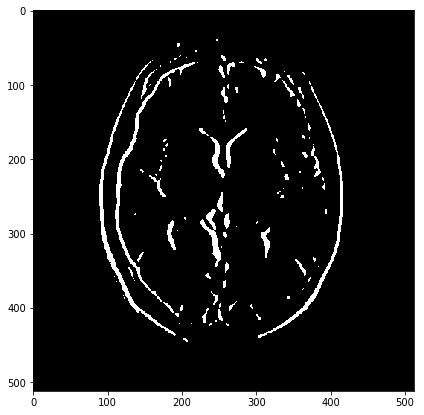

In [31]:
# إنشاء عتبه  لترشيح كل النقاط الضوئية إلى الأبيض 
# فوق مدى معين 
# وبعد ذلك نحول الصورة إلى صورة ثنائية 

retval , binary_image = cv2.threshold(filtered_blurred , 50 ,255 , cv2.THRESH_BINARY)

# إظهار الصورة
plt.figure(figsize=(7,7))
plt.imshow(binary_image , cmap='gray')

# كاشف كاني 
الأن سنقوم بإستخدام كاشف كاني لترشيح الصورة

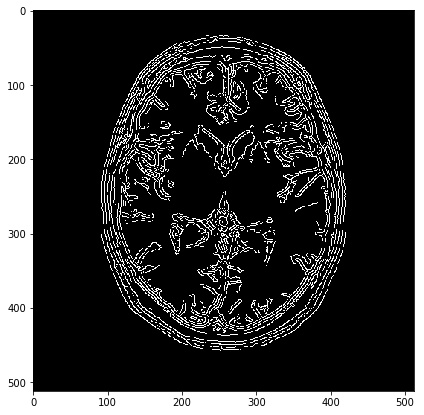

In [32]:
# هنا نقوم بتحديد المستوى الأعلى و المستوى الأدني للتعتيب المتباطى

lower = 30
upper = 100

#مرشح كاني
canny = cv2.Canny(gray, lower, upper)

# إظهار الصورة
plt.figure(figsize=(7,7))
plt.imshow(canny, cmap='gray')

# خوارزميات هوف

هنا سنقوم بقراءة صورة هاتف ذكي و من ثم القيام بإكتشاف حدود الهاتف و أخير إستخدام خوازميات هوف ورسم خط حول شاشة الهاتف

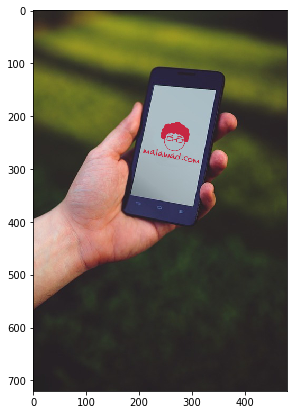

In [53]:
# قراءة الصورة 
phone = cv2.imread('images/phone.jpg')

# RGB تغيير الألوان إلى 
phone = cv2.cvtColor(phone , cv2.COLOR_BGR2RGB)

# إظهار الصورة
plt.figure(figsize=(7,7))
plt.imshow(phone)

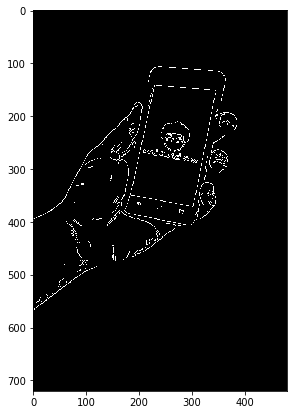

In [54]:
#  تحويل الصورة إلى الرمادي 
phone_gray = cv2.cvtColor(phone , cv2.COLOR_RGB2GRAY)

# إستخدام كاشف كاني
# تعريف عوامل كاشف كاني

lower_threshold = 50
high_threshold = 100
phone_edges = cv2.Canny(phone_gray , lower_threshold , high_threshold)

# إظهار الصورة
plt.figure(figsize=(7,7))
plt.imshow(phone_edges, cmap='gray')

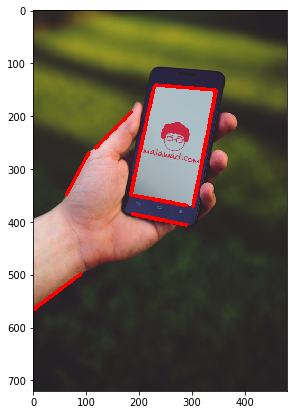

In [61]:
# إيجاد الخطوط بإستخدام تحويل هوف
# تعريف عوامل تحويل هوف
rho = 1
theta = np.pi/180
threshold = 55
min_line_length = 60 
max_line_gap = 3

# إنشاء نسخة من الصور لرسم الخطوط عليها
line_phone = np.copy(phone)

# إستخدام هوف على الصورة المكتشف حدودها

lines = cv2.HoughLinesP(phone_edges , rho , theta , threshold ,
                        np.array([]) , min_line_length , max_line_gap)

# رسم الخطوط فوق الصورة المنسخة

for line in lines : 
    for x1 , y1 , x2 ,y2 in line:
        cv2.line(line_phone , (x1,y1),(x2,y2),(255,0,0),5)

# إظهار الصورة
plt.figure(figsize=(7,7))
plt.imshow(line_phone)

# إكتشاف الوجه بأستخدام خوارزميات هار

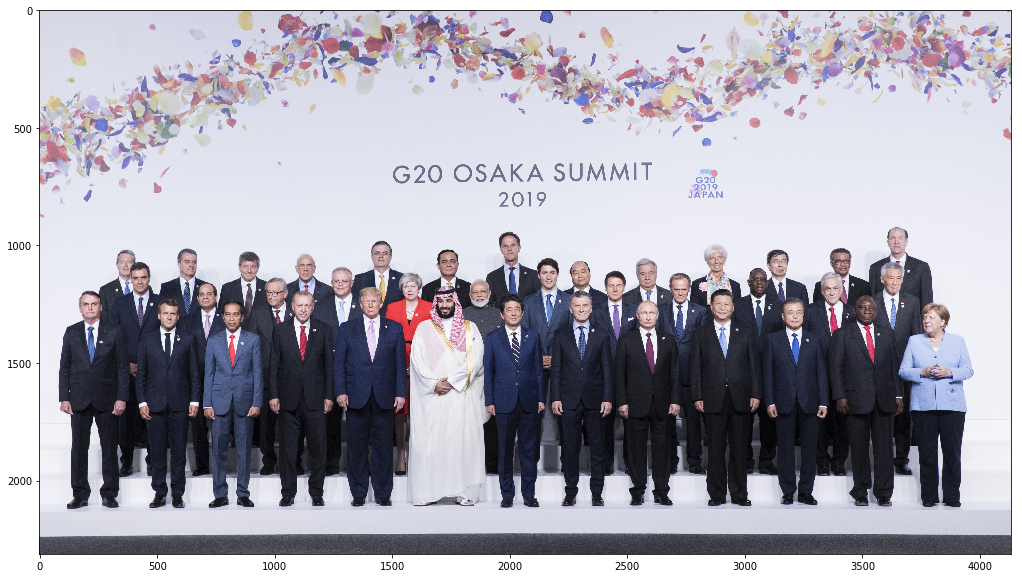

In [67]:
# قراءة الصورة 
faces = cv2.imread('images/g20.jpg')

# RGB تغيير الألوان إلى 
faces = cv2.cvtColor(faces,cv2.COLOR_BGR2RGB)

# إظهار الصورة
plt.figure(figsize=(20,10))
plt.imshow(faces)

In [70]:
#  تحويل الصورة إلى الرمادي 
faces_gray = cv2.cvtColor(faces , cv2.COLOR_RGB2GRAY)

#  قراءة سلسة المصنفات المدربة مسبقا على إكتشاف الأوجه 
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# تطبيق المصنف على الصورة الرمادية
face= face_cascade.detectMultiScale(faces_gray,4,6)

#مخرج المصنف هو مجموعة مصفوفات تحتوي إحداثيات لأبعاد صناديق المحيطة بكل وجه 
# مع العلم أن كل صندوق أبعاده مربع

# طباعة الأوجه المكتشفة 
print ('We found ' + str(len(face)) + ' faces in this images')
print ("thier coordinates and lengths/width are as follows")
print ("====================")
print (face)


We found 34 faces in this images
thier coordinates and lengths/width are as follows
[[1408  997   96   96]
 [ 596 1032   96   96]
 [1695 1032   96   96]
 [3372 1028   96   96]
 [ 321 1031   96   96]
 [3104 1033   96   96]
 [ 847 1051   96   96]
 [1088 1048   96   96]
 [3602  933   96   96]
 [1529 1136   96   96]
 [2405 1134   96   96]
 [3326 1147   96   96]
 [2682 1149   96   96]
 [1826 1161   96   96]
 [1955  963   96   96]
 [2256 1077   96   96]
 [2120 1081   96   96]
 [2540 1083   96   96]
 [ 660 1171   96   96]
 [1363 1202   96   96]
 [1677 1200   96   96]
 [ 171 1213   96   96]
 [2863 1212   96   96]
 [1079 1219   96   96]
 [2260 1219   96   96]
 [ 382 1102   96   96]
 [3595 1102   96   96]
 [1970 1234   96   96]
 [3163 1248   96   96]
 [ 507 1252   96   96]
 [2545 1251   96   96]
 [ 773 1257   96   96]
 [1236 1115   96   96]
 [3741 1271   96   96]]


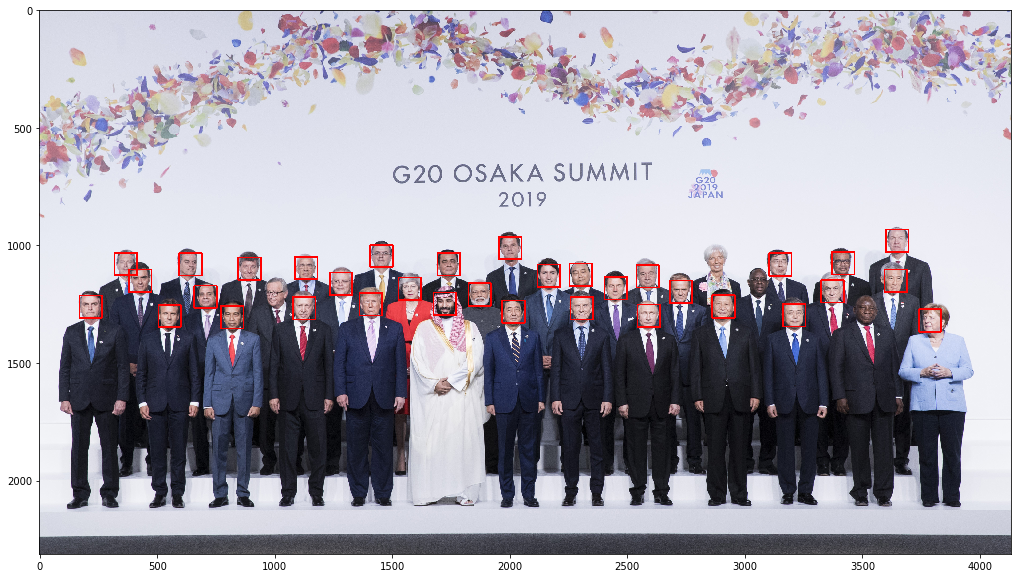

In [71]:
# نسخ الصورة الأصلية لطباعة صناديق الوجه عليها 

img_with_detections = np.copy(faces)

for (x , y, w , h) in face:
    #  العنصر الرابع  (255,0,0) يحدد لون المربع
    # العنصر الأخير يحدد سمك المربع 
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)

# إظهار الصورة 
plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)